In [66]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import h5py
from math import pi

from analysis.config import birds, h5_path_dict, pickle_dir
from analysis.ExpData import ExpData
from analysis.EpisodeCalc import EpisodeCalc

In [ ]:
data = {}
ep_calc = EpisodeCalc(window=30, num_shuffles=100, threshold=0.99)
for key in h5_path_dict.keys():
    for fil in range(len(h5_path_dict[key])):
        fil_string = h5_path_dict[key][fil].as_posix()
        f = h5py.File(fil_string, 'r')
        exp_data = ExpData(f)
        data[fil_string] = {}
        cr_idx_mat, significance = ep_calc.calc_ep_index(exp_data)
        data[fil_string]['cr_idx_mat'] = cr_idx_mat
        data[fil_string]['significance'] = significance
with open(pickle_dir / 'episode_cells.p', 'wb') as f: 
    pickle.dump(data, f)

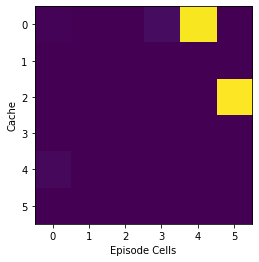

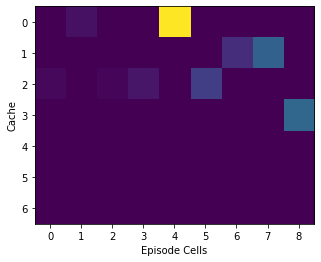

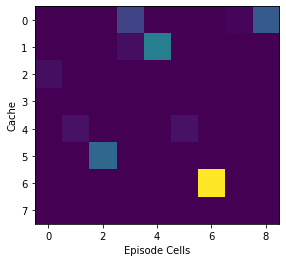

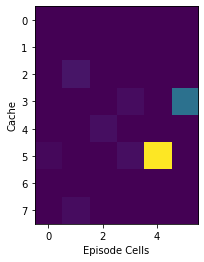

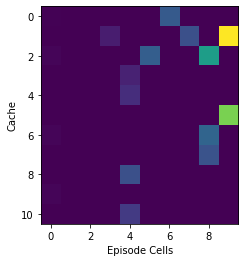

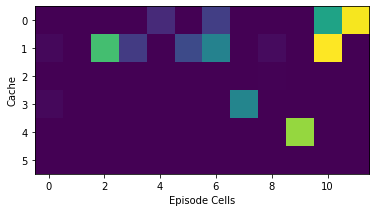

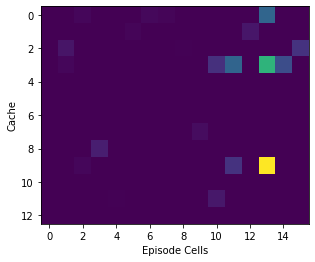

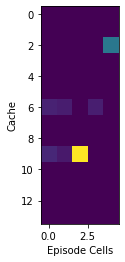

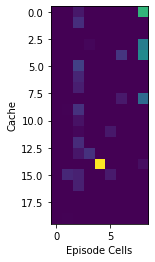

In [67]:
with open(pickle_dir / 'episode_cells.p', 'rb') as f: 
    ep_cells = pickle.load(f)
for key in ep_cells.keys():
    f = h5py.File(key, 'r')
    exp_data = ExpData(f)
    cr_idx_mat = ep_cells[key]['cr_idx_mat']
    significance = ep_cells[key]['significance']
    x = cr_idx_mat[:, significance > 0.99]
    plt.imshow(x)
    plt.ylabel("Cache")
    plt.xlabel("Episode Cells")
    plt.show()